<a href="https://colab.research.google.com/github/germanrcb110566/Trabajo3/blob/Carl-Brandt/Ejercicio_pr%C3%A1ctico_clase_3_Grupo_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargamos el dataset Sample - Superstore.csv
# Specify encoding to handle potential Unicode errors
df = pd.read_csv("Sample - Superstore.csv", encoding='latin1')

# Convertimos la fecha de pedido a formato datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [3]:
# Año más reciente en el dataset
anio_max = df["Order Date"].dt.year.max()

# Filtramos desde ese año menos 4
df_5y = df[df["Order Date"].dt.year >= anio_max - 4]

In [4]:
#Agrupamos por segmento de cliente
segmento_agg = (
    df_5y.groupby("Segment")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

# Calculamos el margen de beneficio
segmento_agg["Profit_Margin (%)"] = (
    segmento_agg["Profit"] / segmento_agg["Sales"]
) * 1


segmento_agg = (
    df_5y.groupby("Segment")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

# Calculamos el margen de beneficio
segmento_agg["Profit_Margin (%)"] = (
    segmento_agg["Profit"] / segmento_agg["Sales"]
) * 100

print(segmento_agg.sort_values("Sales", ascending=False))

       Segment         Sales       Profit  Profit_Margin (%)
0     Consumer  1.161401e+06  134119.2092          11.548050
1    Corporate  7.061464e+05   91979.1340          13.025506
2  Home Office  4.296531e+05   60298.6785          14.034269


/tmp/ipython-input-1260513863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segmento_agg, x="Segment", y="Sales", palette="Blues_d")


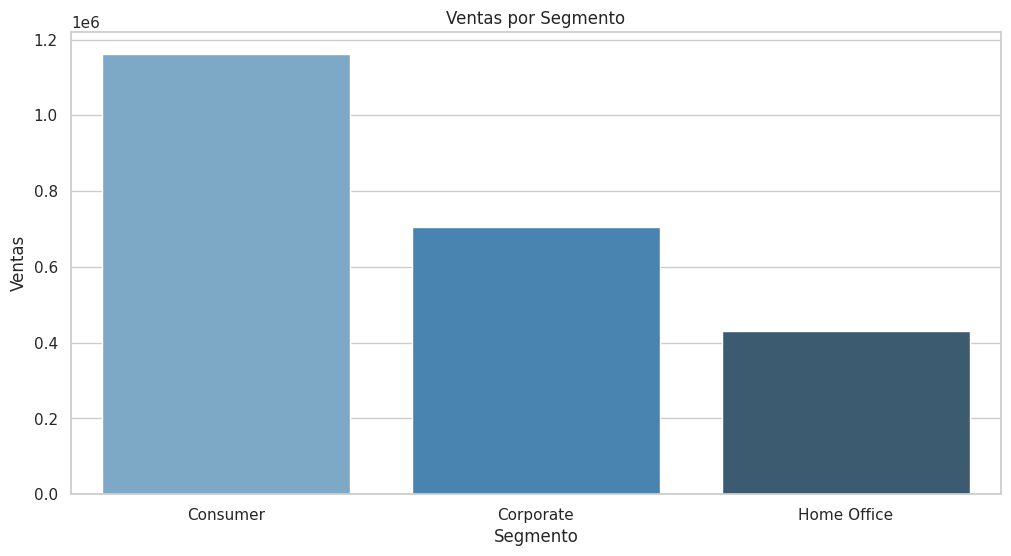

In [13]:
sns.barplot(data=segmento_agg, x="Segment", y="Sales", palette="Blues_d")
plt.title("Ventas por Segmento")
plt.ylabel("Ventas")
plt.xlabel("Segmento")
plt.show()

/tmp/ipython-input-2666513106.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segmento_agg, x="Segment", y="Profit_Margin (%)", palette="Greens_d")


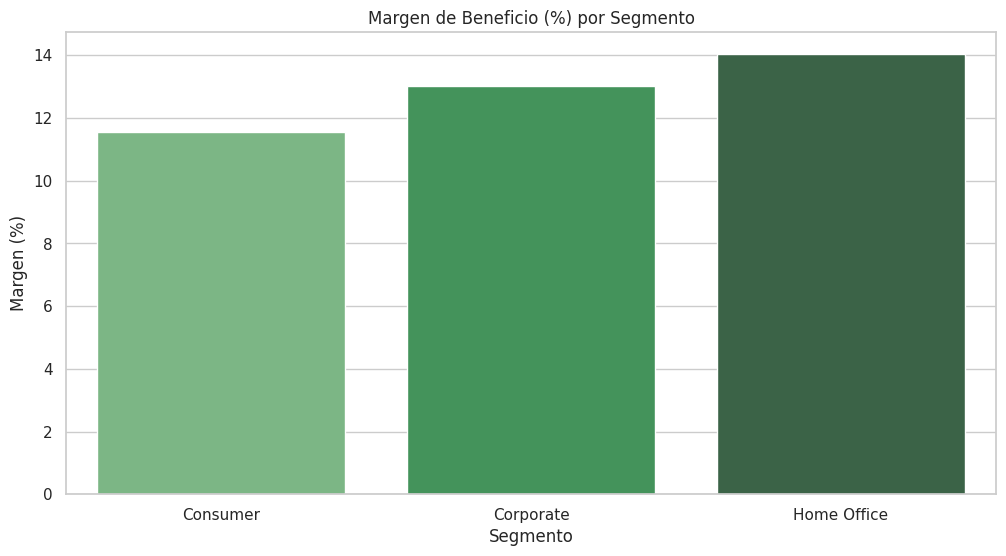

In [14]:
sns.barplot(data=segmento_agg, x="Segment", y="Profit_Margin (%)", palette="Greens_d")
plt.title("Margen de Beneficio (%) por Segmento")
plt.ylabel("Margen (%)")
plt.xlabel("Segmento")
plt.show()

In [7]:
# Queremos saber la evolución de las ventas por años, por lo que creamos una nueva columna con el año
df_5y["Año"] = df_5y["Order Date"].dt.year

# Agrupamos por año
ventas_anuales = (
    df_5y.groupby("Año")[["Sales", "Profit"]]
    .sum()
    .reset_index()
)

# Calculamos el margen de beneficio por año
ventas_anuales["Profit_Margin (%)"] = (
    ventas_anuales["Profit"] / ventas_anuales["Sales"]
) * 100

print(ventas_anuales.sort_values("Año"))

    Año        Sales      Profit  Profit_Margin (%)
0  2014  484247.4981  49543.9741          10.231126
1  2015  470532.5090  61618.6037          13.095504
2  2016  609205.5980  81795.1743          13.426530
3  2017  733215.2552  93439.2696          12.743771


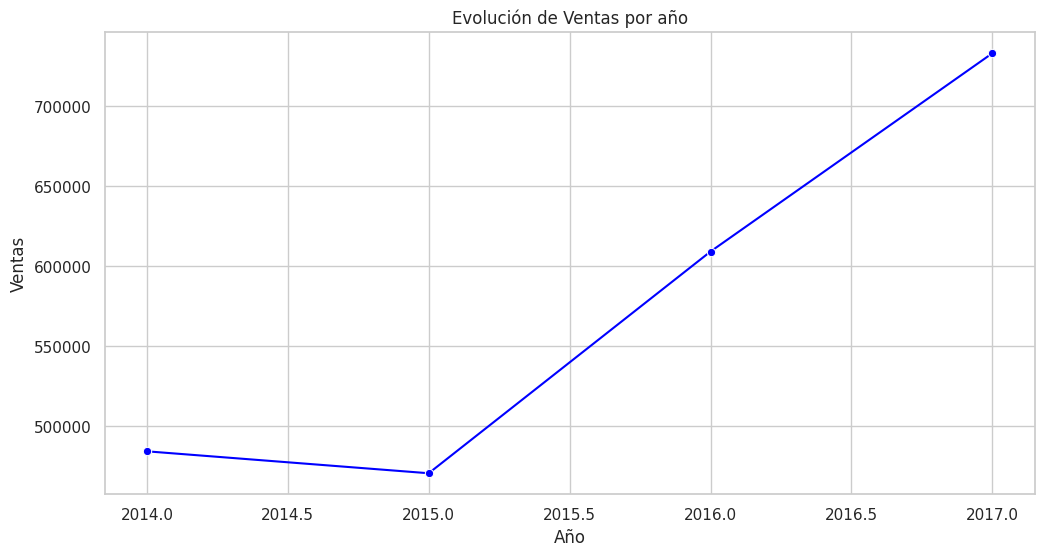

/tmp/ipython-input-1990222026.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_anuales, x="Año", y="Profit_Margin (%)", palette="Purples_d")


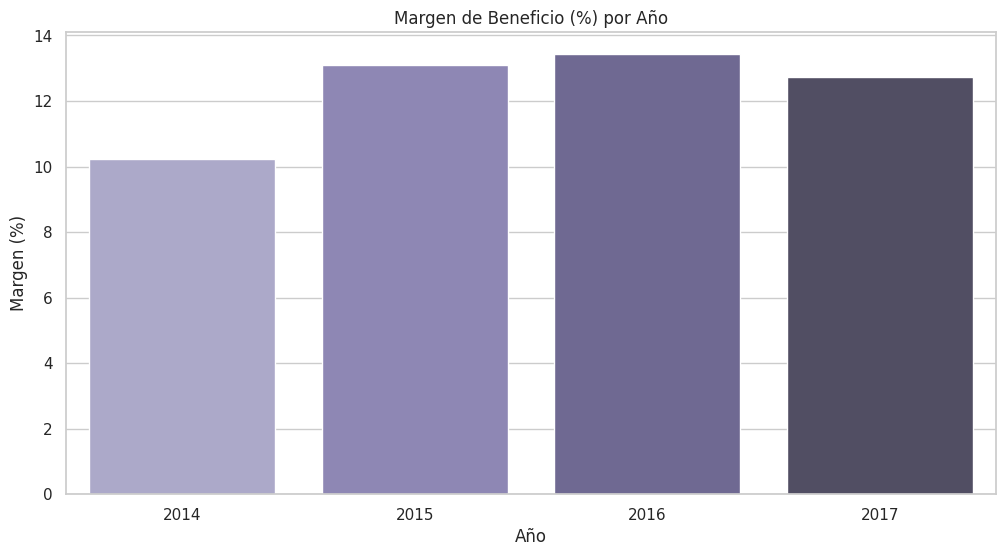

In [15]:
sns.lineplot(data=ventas_anuales, x="Año", y="Sales", marker="o", color="blue")
plt.title("Evolución de Ventas por año")
plt.ylabel("Ventas")
plt.xlabel("Año")
plt.show()

sns.barplot(data=ventas_anuales, x="Año", y="Profit_Margin (%)", palette="Purples_d")
plt.title("Margen de Beneficio (%) por Año")
plt.ylabel("Margen (%)")
plt.xlabel("Año")
plt.show()